# 첫번째 시도!

In [56]:
! mkdir -p ~/aiffel/rock_scissor_paper/scissor
! mkdir -p ~/aiffel/rock_scissor_paper/rock
! mkdir -p ~/aiffel/rock_scissor_paper/paper

! ls -l ~/aiffel/rock_scissor_paper


"""
#이후 각 경로 안에 파일들 옮기고 unzip하는 과정 거침
# 원하는 디렉토리로 이동 =3
cd  ~/aiffel/rock_scissor_paper/rock
unzip rock_hj.zip

cd  ~/aiffel/rock_scissor_paper/scissor
unzip scissor_hj.zip

cd  ~/aiffel/rock_scissor_paper/paper
unzip paper_hj.zip
"""

total 12
drwxr-xr-x 2 root root 4096 Jan  4 07:03 paper
drwxr-xr-x 2 root root 4096 Jan  4 07:03 rock
drwxr-xr-x 2 root root 4096 Jan  4 07:03 scissor


'\n#이후 각 경로 안에 파일들 unzip하는 과정 거침\n# 원하는 디렉토리로 이동 =3\ncd  ~/aiffel/rock_scissor_paper/rock\n\n# 압축 해제 명령어 : unzip <파일명>.zip\nunzip rock.zip\n\n# 가위, 보에 대해서도 똑같이 실행!\ncd  ~/aiffel/rock_scissor_paper/scissor\nunzip scissor.zip\n\ncd  ~/aiffel/rock_scissor_paper/paper\nunzip paper.zip\n'

In [57]:
#테스트 데이터(양재_장혜선 님의 데이터 사용하였음!)를 위한 디렉토리 

! mkdir -p ~/aiffel/rock_scissor_paper_2/scissor
! mkdir -p ~/aiffel/rock_scissor_paper_2/rock
! mkdir -p ~/aiffel/rock_scissor_paper_2/paper

! ls -l ~/aiffel/rock_scissor_paper_2

"""
#이후 각 경로 안에 파일들 옮기고 unzip하는 과정 거침
cd  ~/aiffel/rock_scissor_paper_2/rock
unzip rock_hs.zip

cd  ~/aiffel/rock_scissor_paper_2/scissor
unzip scissor_hs.zip

cd  ~/aiffel/rock_scissor_paper_2/paper
unzip paper_hs.zip
"""

total 12
drwxr-xr-x 2 root root 4096 Jan  4 07:03 paper
drwxr-xr-x 2 root root 4096 Jan  4 07:03 rock
drwxr-xr-x 2 root root 4096 Jan  4 07:03 scissor


'\n#이후 각 경로 안에 파일들 unzip하는 과정 거침\n# 원하는 디렉토리로 이동 =3\ncd  ~/aiffel/rock_scissor_paper_2/rock\n\n# 압축 해제 명령어 : unzip <파일명>.zip\nunzip rock_hs.zip\n\n# 가위, 보에 대해서도 똑같이 실행!\ncd  ~/aiffel/rock_scissor_paper_2/scissor\nunzip scissor_hs.zip\n\ncd  ~/aiffel/rock_scissor_paper_2/paper\nunzip paper_hs.zip\n'

In [58]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 256x256 사이즈로 바꾸어 저장합니다.
	target_size=(256,256)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	

    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
# 파일마다 모두 256x256 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 256x256 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 256x256 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

PIL 라이브러리 import 완료!
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [59]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=256
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 256, 256, 3)
y_train shape: (300,)


라벨:  1


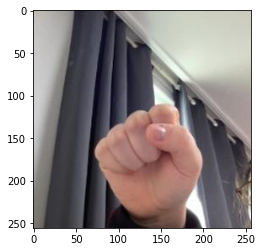

In [60]:
import matplotlib.pyplot as plt
plt.imshow(x_train[199])
print('라벨: ', y_train[199])

In [61]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3936288   
_________________________________________________________________
dense_5 (Dense)              (

In [62]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 34ms/step - loss: 2.4217 - accuracy: 0.4000
Epoch 2/10
10/10 [==============================] - 0s 27ms/step - loss: 0.5250 - accuracy: 0.8467
Epoch 3/10
10/10 [==============================] - 0s 26ms/step - loss: 0.0697 - accuracy: 0.9967
Epoch 4/10
10/10 [==============================] - 0s 27ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 26ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 25ms/step - loss: 4.5099e-04 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 26ms/step - loss: 2.4045e-04 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 27ms/step - loss: 1.9662e-04 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 26ms/step - loss: 1.4247e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 26ms/step - loss: 1.1319e-04 - accura

In [63]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

# 가위,바위,보 각각 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_2/rock"
# 파일마다 모두 256x256 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
# 가위,바위,보 각각 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_2/scissor"
# 파일마다 모두 256x256 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
# 가위,바위,보 각각 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_2/paper"
# 파일마다 모두 256x256 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_2"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 256, 256, 3)
y_test shape: (300,)


라벨:  1


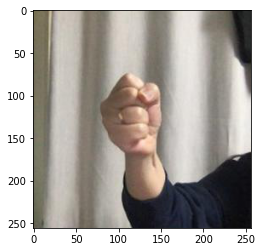

In [64]:
plt.imshow(x_test_norm[199])
print('라벨: ', y_test[199])

In [65]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm ,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 6.9231 - accuracy: 0.3333
test_loss: 6.923073768615723 
test_accuracy: 0.3333333432674408


### 어큐러시 0.33이 모야....  다시 해볼게요..

# 두번째 시도!

In [1]:
#유상민퍼실님 조 내에서 데이터 모은 것으로 다시 츄라이~~~~

! mkdir -p ~/aiffel/rock_scissor_paper_3
! ls -l ~/aiffel/rock_scissor_paper_3

"""
#이후 파일 옮기고 unzip하는 과정 거침
unzip rps_data.zip
"""

total 0


'\n#이후 파일 옮기고 unzip하는 과정 거침\nunzip rps_data.zip\n'

In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	

    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_3/scissor"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_3/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_3/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

PIL 라이브러리 import 완료!
744  images to be resized.
744  images resized.
가위 이미지 resize 완료!
756  images to be resized.
756  images resized.
바위 이미지 resize 완료!
752  images to be resized.
752  images resized.
보 이미지 resize 완료!


In [3]:
import numpy as np

def load_data(img_path, number_of_data=2252):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_3"
(x, y) = load_data(image_dir_path)
x_norm = x/255.0   # 입력은 0~1 사이의 값으로 정규화

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.20, shuffle = True)


print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 2252 입니다.
x_train shape: (1801, 28, 28, 3)
x_test shape: (451, 28, 28, 3)
y_train shape: (1801,)
y_test shape: (451,)


라벨:  1


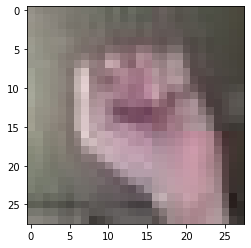

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[199])
print('라벨: ', y_train[199])

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

In [6]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
57/57 [==============================] - 26s 6ms/step - loss: 1.0823 - accuracy: 0.4420
Epoch 2/10
57/57 [==============================] - 0s 3ms/step - loss: 0.8997 - accuracy: 0.6358
Epoch 3/10
57/57 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.7746
Epoch 4/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.8440
Epoch 5/10
57/57 [==============================] - 0s 3ms/step - loss: 0.3728 - accuracy: 0.8617
Epoch 6/10
57/57 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.9178
Epoch 7/10
57/57 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9450
Epoch 8/10
57/57 [==============================] - 0s 3ms/step - loss: 0.1623 - accuracy: 0.9578
Epoch 9/10
57/57 [==============================] - 0s 3ms/step - loss: 0.1271 - accuracy: 0.9695
Epoch 10/10
57/57 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.9772


In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

15/15 - 0s - loss: 0.1211 - accuracy: 0.9645
test_loss: 0.12106750905513763 
test_accuracy: 0.9645232558250427


예측확률분포: [0.00765454 0.2376197  0.75472575]
라벨: 1, 예측결과: 2


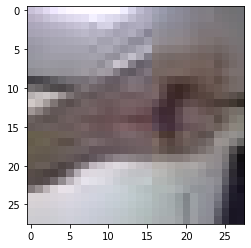

예측확률분포: [0.29059944 0.35200155 0.35739902]
라벨: 0, 예측결과: 2


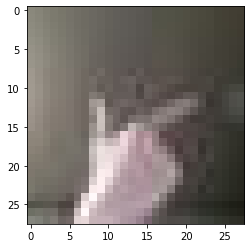

예측확률분포: [0.00765454 0.2376197  0.75472575]
라벨: 1, 예측결과: 2


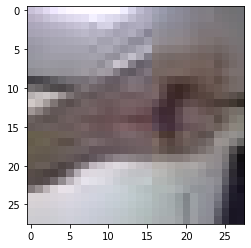

예측확률분포: [0.23161015 0.00355311 0.76483667]
라벨: 0, 예측결과: 2


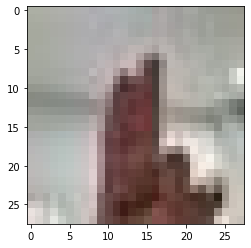

예측확률분포: [0.5118457  0.4007273  0.08742693]
라벨: 1, 예측결과: 0


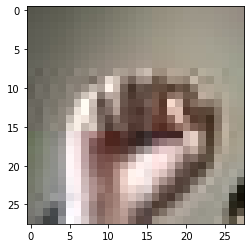

In [10]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 회고....

1. 첫번째 시도: 내 데이터셋(300개)으로 트레이닝 후, 혜선님 데이터셋(300개)로 테스트 했더니 어큐러시 0.33이 나왔다,,,추측하기로는 데이터셋의 크기도 작은 편에다가 + 트레인/테스트 데이터셋이 너무 달라서..? (주변 배경 등)일 것 같다


2. 그래서 두번째 시도에서는 트레이닝 데이터셋의 크기도 크게 하고, 트레인 테스트에 여러사람의 이미지가 고르게 들어갈 수 있도록 셔플을 해서 트레이닝 테스트를 나눠주었음. 우리 조 (유상민 퍼실님 조) 내에서 모은 이미지 총 2252장으로 실험을 진행하였고, 셔플을 해서 트레인 테스트 데이터를 나눴음. 훨씬 향상된 어큐러시를 볼 수 있었다!


3. 두번째 시도 때 2252장의 사진을 256x256으로 리사이징했더니 모델 피팅 할 때 커널이 자꾸 죽었다. 그래서 28x28로 리사이징해서 했더니 바로 돌아갔음...메모리가 터진 것인가..?